In [1]:
import dask
import dask.dataframe as dd

print("Dask version:", dask.__version__)
print("Dask is working fine!")


Dask version: 2025.5.1
Dask is working fine!


In [2]:
import dask.dataframe as dd

# Load the large CSV file
df = dd.read_csv('yellow_tripdata_2019-01.csv')

# Preview the columns and a few rows
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [3]:
print(df.columns)
print(df.dtypes)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')
VendorID                           int64
tpep_pickup_datetime     string[pyarrow]
tpep_dropoff_datetime    string[pyarrow]
passenger_count                    int64
trip_distance                    float64
RatecodeID                         int64
store_and_fwd_flag       string[pyarrow]
PULocationID                       int64
DOLocationID                       int64
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surc

In [4]:
trip_count = df.shape[0].compute()
print(f"Total trips: {trip_count}")


Total trips: 7667792


In [5]:
avg_distance = df['trip_distance'].mean().compute()
print(f"Average trip distance: {avg_distance} miles")


Average trip distance: 2.801083849170661 miles


In [6]:
total_fare = df['fare_amount'].sum().compute()
print(f"Total fare amount: ${total_fare}")


Total fare amount: $95152765.83000001


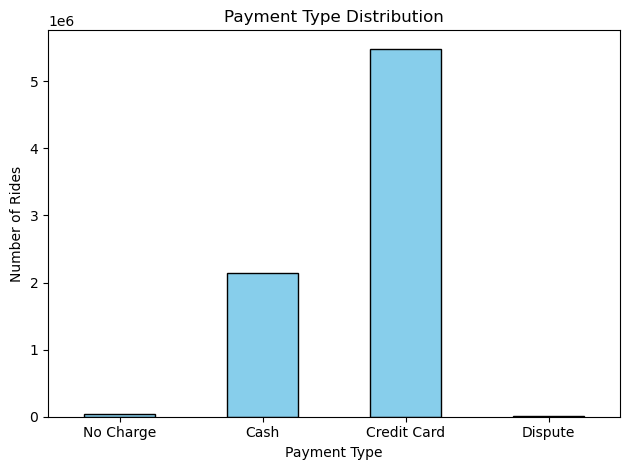

In [8]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Load dataset
df = dd.read_csv('yellow_tripdata_2019-01.csv')

# Compute payment type counts
payment_counts = df['payment_type'].value_counts().compute()

# Optional: Map payment type codes to readable labels
payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
payment_counts.index = payment_counts.index.map(payment_labels)

# Plot
payment_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
